['ASX.AX', 1, 0, 0, 1, 0, 1, 12, 'c', 689.1340896085965, 0.3802633210652483]


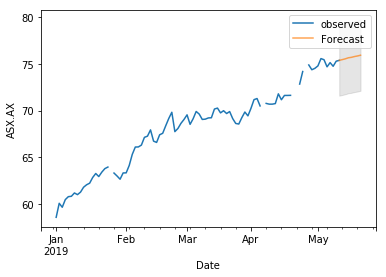

2019-05-10    75.349998
2019-05-13    75.428886
2019-05-14    75.514047
2019-05-15    75.624563
2019-05-16    75.672734
2019-05-17    75.756998
2019-05-20    75.819283
2019-05-21    75.898639
dtype: float64

In [9]:
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016

path='/root/pythondev/JanePython/'
inputfile = path+'Yahoo.xlsx'
outputfile = 'stocks2.csv'
ticker='ASX.AX'

result=predictbyticker(ticker,period='B',steps=7,disp=True)

result

ASX.AX exists in parameters: ['ASX.AX', 1, 0, 1, 0, 0, 0, 12, 't', 50.10242299487784, 0.11924748632063988]


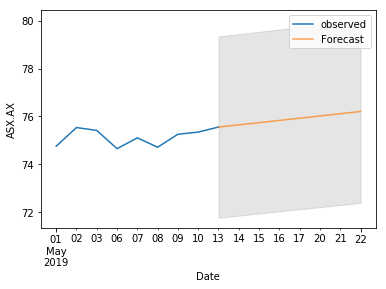

In [2]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)
ticker='ASX.AX'
y=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   
y=y.resample('B').mean()
path='/root/pythondev/JanePython/'
paramPath=path+'parameters.csv'
parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
#parameters=[ticker, 1, 0, 1, 1, 0, 0, 12, 'ct', 93.64345367611821, 0.004347129789365355]

if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=7,disp=True)
else:
    print("wrong parameters",len(parameters))

